# 數據整理:清理、轉換、合併、重塑（後半段）

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 啞變量 pd.get_dummies()，用在onehot encoding

### 可以使用pd.get_dummies(pd.cut(values,bins)) 倚天屠龍一起，離散化數據

In [3]:
df = pd.DataFrame({'key':list('abcbabcef'),
                   'data1':np.arange(9) })
df

,data1,key
0,0,a
1,1,b
2,2,c
3,3,b
4,4,a
5,5,b
6,6,c
7,7,e
8,8,f


In [6]:
df2 = pd.get_dummies(df['key']) #只對特定的人get_dummies
df2.head()

,a,b,c,e,f
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,1,0,0,0,0


In [8]:
df3 = pd.get_dummies(df)
df3.head()

,data1,key_a,key_b,key_c,key_e,key_f
0,0,1,0,0,0,0
1,1,0,1,0,0,0
2,2,0,0,1,0,0
3,3,0,1,0,0,0
4,4,1,0,0,0,0


In [12]:
df3 = pd.DataFrame(df3.iloc[:,1:], index=df3['data1']) #偷吃步把data1拿掉，然後iloc取得後面的數據
df3

,key_a,key_b,key_c,key_e,key_f
data1,,,,,
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,1,0,0,0,0
5,0,1,0,0,0
6,0,0,1,0,0
7,0,0,0,1,0
8,0,0,0,0,1


## string操作

In [14]:
val = 'a,b,c,   d'
val.split(',')

['a', 'b', 'c', '   d']

In [16]:
pieces = [x.strip() for x in val.split(',')]  #去掉左右兩邊空白字元
pieces

['a', 'b', 'c', 'd']

In [17]:
'::'.join(pieces)

'a::b::c::d'

In [18]:
val.find(',') #找第一個

1

In [22]:
val.rfind(',') #找最後一個

5

In [19]:
val.count(',')

3

In [20]:
val.index(',') #若無字串，會引發異常

1

In [21]:
'::'.join(pieces).replace('::',',')

'a,b,c,d'

In [24]:
data = {'A':'I', 'B':'am', 'C':'good'}
data

{'A': 'I', 'B': 'am', 'C': 'good'}

In [28]:
data = pd.Series(data)
data.str.contains('a') #檢驗是否含有特定字串

A    False
B     True
C    False
dtype: bool

# Ch7 繪圖和可視覺化

## Matplotlib繪圖：較低階，需要設置多種參數

In [29]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 創造subplot

### 方法一：fig.add\_subplot(nrows, ncols, no.N)

In [56]:
fig = plt.figure(figsize=(8,6)) #最重要是figsize

In [57]:
np.random.seed(42)
ax1 = fig.add_subplot(2,2,1) #記得subplot的座標世界(2,2,  編號1)
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.5)

ax2 = fig.add_subplot(2,2,2)
ax2.scatter(np.arange(50), np.arange(50)+np.random.randn(50)*10)

ax3 = fig.add_subplot(2,2,3)
ax3.plot(np.random.randn(100).cumsum(), 'k--')

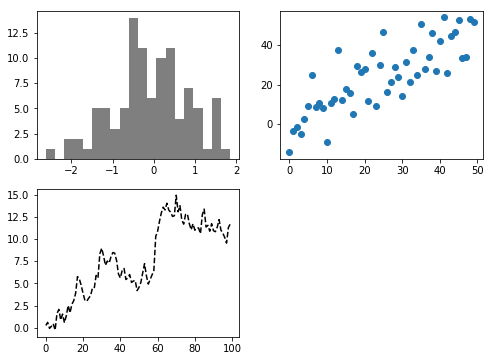

In [58]:
fig

### 方法二： fig, axes = plt.subplots(nrows, ncols) || axes[i,j].plot...

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112603fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111c599b0>]], dtype=object)

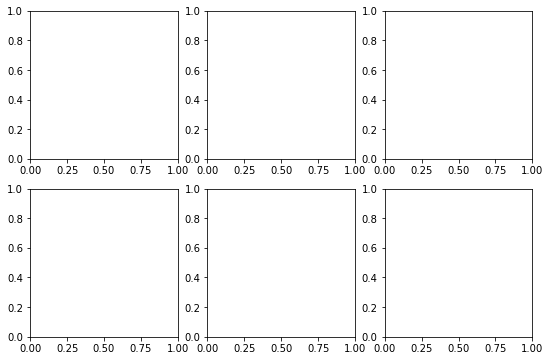

In [67]:
fig, axes = plt.subplots(2,3, figsize=(9,6), sharex=False, sharey=False)
axes

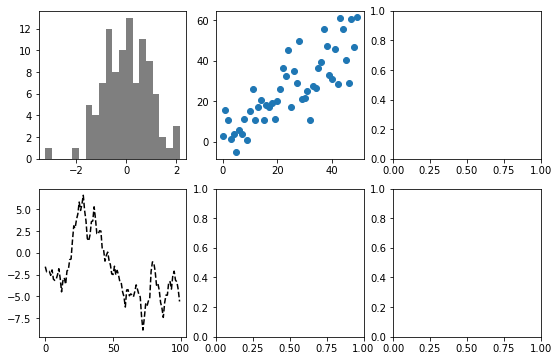

In [75]:
fig, axes = plt.subplots(2,3, figsize=(9,6), sharex=False, sharey=False)
axes[0,0].hist(np.random.randn(100), bins=20, color='k', alpha=0.5)
axes[0,1].scatter(np.arange(50), np.arange(50)+np.random.randn(50)*10)
axes[1,0].plot(np.random.randn(100).cumsum(), 'k--')

### 調整subplot周圍間距

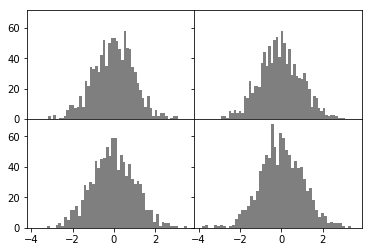

In [71]:
fig, axes = plt.subplots(2,2, figsize=(6,4), sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(1000), bins=50, color='k', alpha=0.5)

plt.subplots_adjust(wspace=0, hspace=0)

### 設置標題、軸線刻度方向: .set_xticks(), .set_xticklabels(), .set_title(), .set_xlabel()

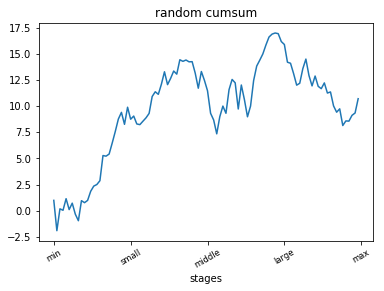

In [82]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(np.random.randn(100).cumsum())
ticks = ax.set_xticks([0, 25, 50 , 75, 100]) #數值方面
labels = ax.set_xticklabels(['min','small','middle','large','max'],
                            rotation = 30, fontsize='small')  #把數值變成文字
ax.set_title('random cumsum')
ax.set_xlabel('stages')

### 添加圖例，使用label標註線，.legend(loc='')顯示標註

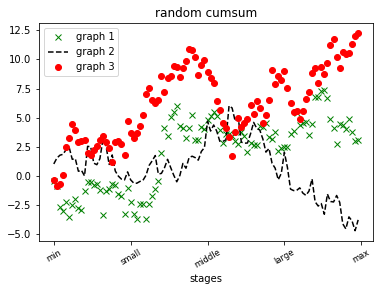

In [96]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(np.random.randn(100).cumsum(), 'gx', label = 'graph 1')
ax.plot(np.random.randn(100).cumsum(), 'k--', label = 'graph 2')
ax.plot(np.random.randn(100).cumsum(), 'ro', label = 'graph 3')

ticks = ax.set_xticks([0, 25, 50 , 75, 100])
labels = ax.set_xticklabels(['min','small','middle','large','max'],
                            rotation = 30, fontsize='small')
ax.set_title('random cumsum')
ax.set_xlabel('stages')
ax.legend(loc='best')

### 儲存圖表: plt.savefig(filename, dpi=600, bbox_inches='tight')

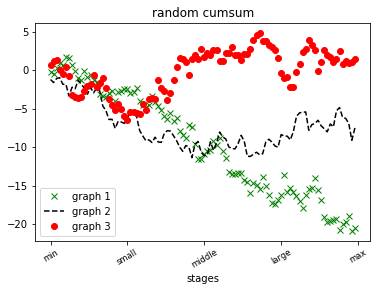

In [97]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(np.random.randn(100).cumsum(), 'gx', label = 'graph 1')
ax.plot(np.random.randn(100).cumsum(), 'k--', label = 'graph 2')
ax.plot(np.random.randn(100).cumsum(), 'ro', label = 'graph 3')

ticks = ax.set_xticks([0, 25, 50 , 75, 100])
labels = ax.set_xticklabels(['min','small','middle','large','max'],
                            rotation = 30, fontsize='small')
ax.set_title('random cumsum')
ax.set_xlabel('stages')
ax.legend(loc='best')

plt.savefig('random_cumsum.png', dpi=400, bbox_inches='tight')

## Pandas繪圖：較高階

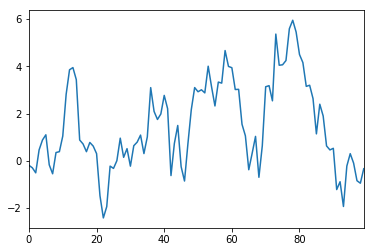

In [98]:
s = pd.Series(np.random.randn(100).cumsum(), index = np.arange(100))
s.plot()

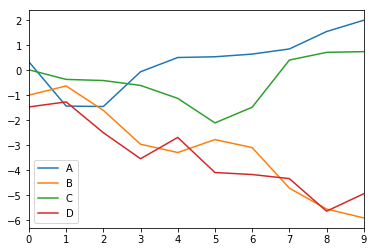

In [100]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0), #還是要標記x的axis=0
                  index = np.arange(10),
                  columns = list('ABCD'))
df.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11acb7be0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11b479438>], dtype=object)

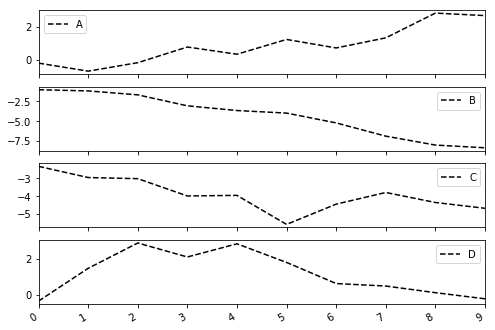

In [126]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0), #還是要標記x的axis=0
                  index = np.arange(10),
                  columns = list('ABCD'))

df.plot(subplots=True, sharex=True, style='k--', figsize=(8,6))

### bar: kind='bar'

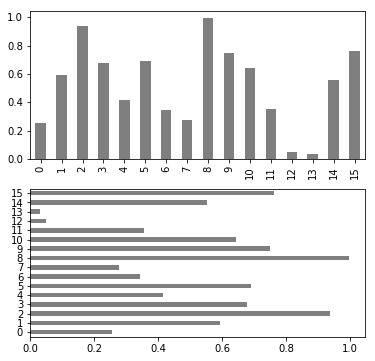

In [115]:
fig, axes = plt.subplots(2,1, figsize=(6,6))
data = pd.Series(np.random.rand(16), index = np.arange(16))

data.plot(kind='bar', ax=axes[0], color='k', alpha=0.5)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.5)

### 顯示成對顏色 colormap='Paired'

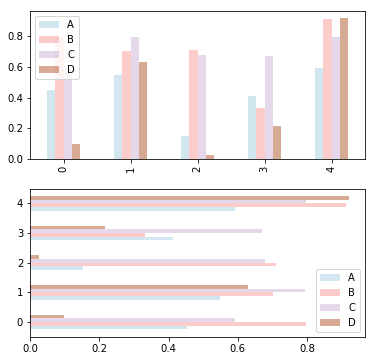

In [128]:
fig, axes = plt.subplots(2,1, figsize=(6,6))
data = pd.DataFrame(np.random.rand(5,4), index = np.arange(5), columns=list('ABCD'))

data.plot(kind='bar', ax=axes[0], alpha=0.5, colormap='Paired')
data.plot(kind='barh', ax=axes[1], alpha=0.5, colormap='Paired')

### 可以堆疊，stacked=True

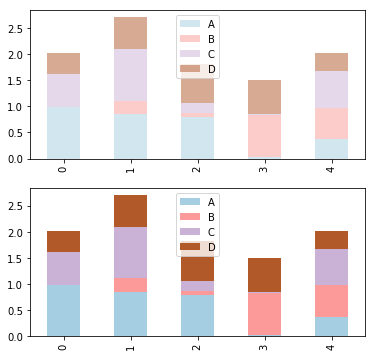

In [129]:
fig, axes = plt.subplots(2,1, figsize=(6,6))
data = pd.DataFrame(np.random.rand(5,4), index = np.arange(5), columns=list('ABCD'))

data.plot.bar(ax=axes[0], colormap='Paired', alpha=0.5, stacked=True)
data.plot.bar(ax=axes[1], colormap='Paired', alpha=1, stacked=True)

### histogram: kind='hist'

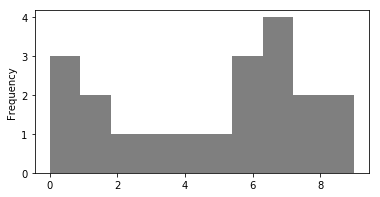

In [137]:
fig, axes = plt.subplots(1,1, figsize=(6,3))
data = pd.Series(np.random.randint(0,10, size=(20)), index = np.arange(20))

data.plot(kind='hist', color='k', alpha=0.5)

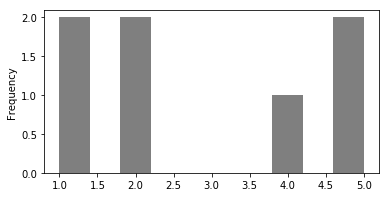

In [149]:
fig, axes = plt.subplots(1,1, figsize=(6,3))
data = pd.Series(np.random.randint(0,10, size=(20)), index = np.arange(20))
data2 = data.value_counts()
data3 = data2.value_counts()/data2.value_counts().sum()

data2.plot(kind='hist', color='k', alpha=0.5)

### density: kind = 'kde' (Kernel density estimate)

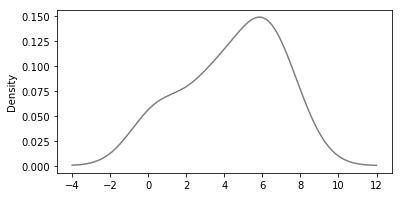

In [150]:
fig, axes = plt.subplots(1,1, figsize=(6,3))
data = pd.Series(np.random.randint(0,10, size=(20)), index = np.arange(20))

data.plot(kind='kde', color='k', alpha=0.5)

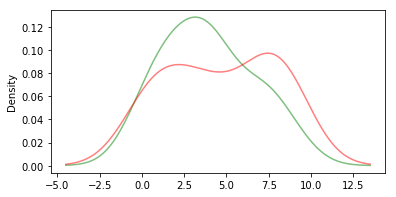

In [151]:
fig, axes = plt.subplots(1,1, figsize=(6,3))
data = pd.Series(np.random.randint(0,10, size=(20)), index = np.arange(20))
data2 = pd.Series(np.random.randint(0,10, size=(20)), index = np.arange(20))

data.plot(kind='kde', color='g', alpha=0.5)
data2.plot(kind='kde', color='r', alpha=0.5)

### scatter.plot(x ,y)

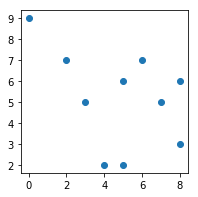

In [157]:
fig, axes = plt.subplots(1,1, figsize=(3,3))
data = pd.Series(np.random.randint(0,10, size=(10)), index = np.arange(10))
data2 = pd.Series(np.random.randint(0,10, size=(10)), index = np.arange(10))

plt.scatter(data, data2)

### pd.scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121e7c160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x122739358>]], dtype=object)

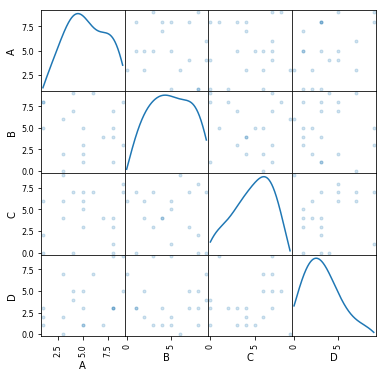

In [168]:
data = pd.DataFrame(np.random.randint(0,10, size=(20, 4)), 
                    index = np.arange(20), columns = ['A','B','C','D'])

pd.scatter_matrix(data, alpha=0.2, figsize=(6, 6), diagonal='kde')

# Ch8 數據聚合、分組運算: split-apply-combine

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Groupby

In [177]:
df = pd.DataFrame({'key1':['a','b','a','a','b'],
                   'key2':['one','two','one','two','two'],
                   'data1':np.random.rand(5),
                   'data2':np.random.rand(5)})
df

,data1,data2,key1,key2
0,0.214458,0.679393,a,one
1,0.074159,0.936688,b,two
2,0.891454,0.826949,a,one
3,0.847681,0.844426,a,two
4,0.992590,0.569142,b,two


### df['a'].groupby(df['b']).func(): a的數據用b分類，並且計算，默認是axis=0

In [178]:
grouped = df['data1'].groupby(df['key1']) #由data1，用key1的分類方法取出相關數值做計算
grouped

In [179]:
grouped.mean()

key1
a    0.651198
b    0.533374
Name: data1, dtype: float64

In [180]:
grouped.sum()

key1
a    1.953593
b    1.066749
Name: data1, dtype: float64

In [182]:
means = df['data1'].groupby( [df['key1'],df['key2']] ).mean()  #沒有的人會自動被忽略
means

key1  key2
a     one     0.552956
      two     0.847681
b     two     0.533374
Name: data1, dtype: float64

In [184]:
means.unstack()

key2,one,two
key1,,
a,0.552956,0.847681
b,NaN,0.533374


In [185]:
df['data1'].groupby( [df['key1'],df['key2']] ).size()

key1  key2
a     one     2
      two     1
b     two     2
dtype: int64

### 分組迭代

In [186]:
for name, group in df.groupby('key1'): #單一key
    print(name)
    print(group)

a
      data1     data2 key1 key2
0  0.214458  0.679393    a  one
2  0.891454  0.826949    a  one
3  0.847681  0.844426    a  two
b
      data1     data2 key1 key2
1  0.074159  0.936688    b  two
4  0.992590  0.569142    b  two


In [192]:
for (k1,k2) , group in df.groupby(['key1','key2']): #多重key
    print(k1,k2)
    print(group)

a one
      data1     data2 key1 key2
0  0.214458  0.679393    a  one
2  0.891454  0.826949    a  one
a two
      data1     data2 key1 key2
3  0.847681  0.844426    a  two
b two
      data1     data2 key1 key2
1  0.074159  0.936688    b  two
4  0.992590  0.569142    b  two


In [194]:
pieces = dict(list(df.groupby('key1'))) #做成字典使用
pieces['a']

,data1,data2,key1,key2
0,0.214458,0.679393,a,one
2,0.891454,0.826949,a,one
3,0.847681,0.844426,a,two


In [198]:
pieces['a'].iloc[1] #用iloc選取數據row

data1    0.891454
data2    0.826949
key1            a
key2          one
Name: 2, dtype: object

換個等價寫法

In [200]:
df.groupby('key1')['data1'].mean()

key1
a    0.651198
b    0.533374
Name: data1, dtype: float64

In [202]:
df.groupby(['key1','key2'])['data1'].mean()

key1  key2
a     one     0.552956
      two     0.847681
b     two     0.533374
Name: data1, dtype: float64

### 透過dict映射或Series分組

In [224]:
people = pd.DataFrame(np.random.randn(5,5),
                      columns = list('abcde'),
                      index = ['A','BB','CCC','DDDD','EEEEE']) #index人名

people.ix[2:3, ['b','c']] = np.nan #記得ix是有包含後面的

people

,a,b,c,d,e
A,-1.551537,2.214330,-1.347709,-0.321753,-0.032481
BB,1.912688,-1.324846,1.983704,0.757177,0.417095
CCC,-0.984634,NaN,NaN,1.266661,-0.971062
DDDD,-0.113158,-0.555273,-0.987523,0.741320,0.535459
EEEEE,1.209010,-1.779875,1.064171,2.505449,-0.451641


In [225]:
#用字典表達映射關係，直接分組
mapping = {
    'a':'apple',
    'b':'banana',
    'c':'apple',
    'd':'apple',
    'e':'banana'
}

In [226]:
by_column = people.groupby(mapping, axis=1)
by_column.sum()

,apple,banana
A,-3.220999,2.181849
BB,4.653569,-0.907750
CCC,0.282028,-0.971062
DDDD,-0.359362,-0.019814
EEEEE,4.778630,-2.231516


In [227]:
map_series = pd.Series(mapping)
map_series

a     apple
b    banana
c     apple
d     apple
e    banana
dtype: object

In [228]:
people.groupby(map_series, axis=1).count()

,apple,banana
A,3,2
BB,3,2
CCC,2,1
DDDD,3,2
EEEEE,3,2


### 透過函數分組

In [229]:
people.groupby(len).sum() #按照index名字長度排序

,a,b,c,d,e
1,-1.551537,2.214330,-1.347709,-0.321753,-0.032481
2,1.912688,-1.324846,1.983704,0.757177,0.417095
3,-0.984634,NaN,NaN,1.266661,-0.971062
4,-0.113158,-0.555273,-0.987523,0.741320,0.535459
5,1.209010,-1.779875,1.064171,2.505449,-0.451641


In [231]:
key_list = 'one','two','one','two','two'
people.groupby([len, key_list]).sum()

,,a,b,c,d,e
1,one,-1.551537,2.214330,-1.347709,-0.321753,-0.032481
2,two,1.912688,-1.324846,1.983704,0.757177,0.417095
3,one,-0.984634,NaN,NaN,1.266661,-0.971062
4,two,-0.113158,-0.555273,-0.987523,0.741320,0.535459
5,two,1.209010,-1.779875,1.064171,2.505449,-0.451641


### 根據索引級別分組

In [235]:
columns = pd.MultiIndex.from_arrays([['A','A','A','B','B'],
                                     ['1','3','5','1','2']]
                                    , names=['country','city'])
hier_df = pd.DataFrame(np.random.randn(5,5), columns=columns)
hier_df

country         A                             B          
city            1         3         5         1         2
0        0.410383  1.214667 -0.144867  0.405824  0.016374
1       -0.986943 -2.255791  0.431010  0.173947 -0.618175
2       -1.619173  0.629740 -0.265920  0.556875  1.864049
3       -2.141431 -0.699601 -0.209376  1.454826 -1.636403
4        1.935861  0.135856 -0.096001 -0.198060 -0.436263

In [236]:
hier_df.groupby(level='city',axis=1).count()

city,1,2,3,5
0,2,1,1,1
1,2,1,1,1
2,2,1,1,1
3,2,1,1,1
4,2,1,1,1


## 數據聚合

In [237]:
df = pd.DataFrame({'key1':['a','b','a','a','b'],
                   'key2':['one','two','one','two','two'],
                   'data1':np.random.rand(5),
                   'data2':np.random.rand(5)})
df

,data1,data2,key1,key2
0,0.612209,0.312406,a,one
1,0.152887,0.514383,b,two
2,0.066169,0.588759,a,one
3,0.215938,0.789868,a,two
4,0.127854,0.656240,b,two


### 聚合函數： groupby對象.agg.(func)，切記速度極慢！！

In [243]:
def peak_to_peak(arr):
    return arr.max()-arr.min()

grouped = df['data1'].groupby(df['key1'])
grouped.agg(peak_to_peak)

key1
a    0.546040
b    0.025033
Name: data1, dtype: float64

In [244]:
grouped.describe()

key1       
a     count    3.000000
      mean     0.298105
      std      0.282141
      min      0.066169
      25%      0.141053
      50%      0.215938
      75%      0.414074
      max      0.612209
b     count    2.000000
      mean     0.140370
      std      0.017701
      min      0.127854
      25%      0.134112
      50%      0.140370
      75%      0.146629
      max      0.152887
Name: data1, dtype: float64

### 面向columns操作

原書的數據tips.csv

In [269]:
df = pd.read_csv('tips.csv', index_col = 'id')
df['tip_pct'] = df.tip/df.total_bill
df.head()

,total_bill,tip,smoker,day,time,size,tip_pct
id,,,,,,,
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [270]:
grouped = df.groupby(['smoker','day']) #用smoker和day做分組
grouped

In [271]:
grouped_pct = grouped['tip_pct'] #用tip_pct來計算數值
grouped_pct.agg('mean')

smoker  day 
No      Fri     0.139622
        Sat     0.155259
        Sun     0.161872
        Thur    0.159609
Yes     Fri     0.165347
        Sat     0.167152
        Thur    0.144107
Name: tip_pct, dtype: float64

In [275]:
func = ['max','min','mean','std']
grouped_pct.agg(func) #一次計算多種函數

max       min      mean       std
smoker day                                         
No     Fri   0.155625  0.120385  0.139622  0.017841
       Sat   0.227679  0.056797  0.155259  0.033884
       Sun   0.252672  0.059447  0.161872  0.043435
       Thur  0.266312  0.072961  0.159609  0.039406
Yes    Fri   0.263480  0.103555  0.165347  0.052676
       Sat   0.325733  0.056433  0.167152  0.065748
       Thur  0.154321  0.125000  0.144107  0.016560

In [277]:
func = ['max','min','mean','std']
grouped_pct = grouped['tip_pct','total_bill'] #用tip_pct來計算數值
result = grouped_pct.agg(func)
result

tip_pct                               total_bill         \
                  max       min      mean       std        max    min   
smoker day                                                              
No     Fri   0.155625  0.120385  0.139622  0.017841      22.75  12.46   
       Sat   0.227679  0.056797  0.155259  0.033884      48.27   7.25   
       Sun   0.252672  0.059447  0.161872  0.043435      38.07   8.77   
       Thur  0.266312  0.072961  0.159609  0.039406      41.19   7.51   
Yes    Fri   0.263480  0.103555  0.165347  0.052676      40.17   5.75   
       Sat   0.325733  0.056433  0.167152  0.065748      44.30   3.07   
       Thur  0.154321  0.125000  0.144107  0.016560      32.68  16.00   

                                   
                  mean        std  
smoker day                         
No     Fri   19.233333   5.867319  
       Sat   19.099722   7.658687  
       Sun   19.866364   7.588927  
       Thur  17.296512   7.758278  
Yes    Fri   19.806667  10.707851  
       Sat   20.170000   9.971825  
       Thur  22.706667   8.806755

In [278]:
result['total_bill']

max    min       mean        std
smoker day                                     
No     Fri   22.75  12.46  19.233333   5.867319
       Sat   48.27   7.25  19.099722   7.658687
       Sun   38.07   8.77  19.866364   7.588927
       Thur  41.19   7.51  17.296512   7.758278
Yes    Fri   40.17   5.75  19.806667  10.707851
       Sat   44.30   3.07  20.170000   9.971825
       Thur  32.68  16.00  22.706667   8.806755

## 分組級運算和轉換

In [279]:
df = pd.DataFrame({'key1':['a','b','a','a','b'],
                   'key2':['one','two','one','two','two'],
                   'data1':np.random.rand(5),
                   'data2':np.random.rand(5)})
df

,data1,data2,key1,key2
0,0.608758,0.230000,a,one
1,0.411782,0.005721,b,two
2,0.473808,0.651320,a,one
3,0.414521,0.202462,a,two
4,0.842166,0.890115,b,two


In [280]:
k1_means = df.groupby('key1').mean().add_prefix('mean_') #算出來的數值是mean，把這個字串加到
k1_means

,mean_data1,mean_data2
key1,,
a,0.499029,0.361261
b,0.626974,0.447918


In [281]:
pd.merge(df, k1_means, left_on='key1', right_index=True) #把剛剛進算的結果放入df中

,data1,data2,key1,key2,mean_data1,mean_data2
0,0.608758,0.230000,a,one,0.499029,0.361261
2,0.473808,0.651320,a,one,0.499029,0.361261
3,0.414521,0.202462,a,two,0.499029,0.361261
1,0.411782,0.005721,b,two,0.626974,0.447918
4,0.842166,0.890115,b,two,0.626974,0.447918


In [282]:
people = pd.DataFrame(np.random.randn(5,5),
                      columns = list('abcde'),
                      index = ['A','BB','CCC','DDDD','EEEEE']) #index人名

people

,a,b,c,d,e
A,1.048117,-0.011997,-0.978023,-1.497232,0.726512
BB,0.693706,1.584494,-0.790017,0.692815,-0.283707
CCC,1.190475,1.021963,0.211209,-0.339530,0.960932
DDDD,0.646905,-0.684440,-1.327799,-0.288533,1.515414
EEEEE,1.146487,-1.112327,-1.167757,1.274684,-1.135636


In [284]:
key_list = 'one','two','one','two','two'
people.groupby([len, key_list]).sum()

,,a,b,c,d,e
1,one,1.048117,-0.011997,-0.978023,-1.497232,0.726512
2,two,0.693706,1.584494,-0.790017,0.692815,-0.283707
3,one,1.190475,1.021963,0.211209,-0.339530,0.960932
4,two,0.646905,-0.684440,-1.327799,-0.288533,1.515414
5,two,1.146487,-1.112327,-1.167757,1.274684,-1.135636


In [285]:
key = ['one','two','two','one','one']
people.groupby(key).mean()

,a,b,c,d,e
one,0.947169,-0.602922,-1.157860,-0.170360,0.368763
two,0.942091,1.303229,-0.289404,0.176643,0.338613


### transform: 將函數應用到各個分組，並且把數值返回所在欄位

In [286]:
people.groupby(key).transform(np.mean)

,a,b,c,d,e
A,0.947169,-0.602922,-1.157860,-0.170360,0.368763
BB,0.942091,1.303229,-0.289404,0.176643,0.338613
CCC,0.942091,1.303229,-0.289404,0.176643,0.338613
DDDD,0.947169,-0.602922,-1.157860,-0.170360,0.368763
EEEEE,0.947169,-0.602922,-1.157860,-0.170360,0.368763


In [288]:
def demean(arr):
    return arr-arr.mean()

demeaned = people.groupby(key).transform(demean)
demeaned

,a,b,c,d,e
A,0.100947,0.590924,0.179837,-1.326872,0.357748
BB,-0.248384,0.281266,-0.500613,0.516173,-0.622319
CCC,0.248384,-0.281266,0.500613,-0.516173,0.622319
DDDD,-0.300265,-0.081519,-0.169939,-0.118172,1.146651
EEEEE,0.199318,-0.509406,-0.009898,1.445044,-1.504399


In [289]:
demeaned.groupby(key).mean()

,a,b,c,d,e
one,1.110223e-16,-3.700743e-17,-7.401487e-17,7.401487e-17,0.0
two,5.551115e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.0


### apply

In [290]:
df = pd.read_csv('tips.csv', index_col = 'id')
df['tip_pct'] = df.tip/df.total_bill
df.head()

,total_bill,tip,smoker,day,time,size,tip_pct
id,,,,,,,
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [293]:
#寫一個選取tip_pct最高額度的前五位欄位函數
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]

top(df, n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
id,,,,,,,
88,24.71,5.85,No,Thur,Lunch,2,0.236746
51,10.29,2.60,No,Sun,Dinner,2,0.252672
93,16.32,4.30,Yes,Fri,Dinner,2,0.263480
149,7.51,2.00,No,Thur,Lunch,2,0.266312
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733


In [294]:
df.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker id                                                        
No     17        16.29  3.71     No   Sun  Dinner     3  0.227747
       6          8.77  2.00     No   Sun  Dinner     2  0.228050
       88        24.71  5.85     No  Thur   Lunch     2  0.236746
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
Yes    63        18.29  3.76    Yes   Sat  Dinner     4  0.205577
       100       11.35  2.50    Yes   Fri  Dinner     2  0.220264
       93        16.32  4.30    Yes   Fri  Dinner     2  0.263480
       109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733

In [298]:
df.groupby(['smoker','day']).apply(top,n=3,column='total_bill') #可以修改top裡面的參數，只要加上,就好了

total_bill   tip smoker   day    time  size   tip_pct
smoker day  id                                                        
No     Fri  99        12.46  1.50     No   Fri  Dinner     2  0.120385
            91        22.49  3.50     No   Fri  Dinner     2  0.155625
            94        22.75  3.25     No   Fri  Dinner     2  0.142857
       Sat  39        31.27  5.00     No   Sat  Dinner     3  0.159898
            23        39.42  7.58     No   Sat  Dinner     4  0.192288
            59        48.27  6.73     No   Sat  Dinner     4  0.139424
       Sun  52        34.81  5.20     No   Sun  Dinner     4  0.149382
            11        35.26  5.00     No   Sun  Dinner     4  0.141804
            112       38.07  4.00     No   Sun  Dinner     3  0.105070
       Thur 141       34.30  6.70     No  Thur   Lunch     6  0.195335
            85        34.83  5.17     No  Thur   Lunch     4  0.148435
            142       41.19  5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  96        27.28  4.00    Yes   Fri  Dinner     2  0.146628
            90        28.97  3.00    Yes   Fri  Dinner     2  0.103555
            95        40.17  4.73    Yes   Fri  Dinner     4  0.117750
       Sat  72        26.86  3.14    Yes   Sat  Dinner     2  0.116902
            56        38.01  3.00    Yes   Sat  Dinner     4  0.078927
            102       44.30  2.50    Yes   Sat  Dinner     3  0.056433
       Thur 138       16.00  2.00    Yes  Thur   Lunch     2  0.125000
            80        19.44  3.00    Yes  Thur   Lunch     2  0.154321
            83        32.68  5.00    Yes  Thur   Lunch     2  0.152999

In [301]:
df.groupby('smoker', group_keys=False).apply(top) #禁止分組，不會產生層次

,total_bill,tip,smoker,day,time,size,tip_pct
id,,,,,,,
17,16.29,3.71,No,Sun,Dinner,3,0.227747
6,8.77,2.00,No,Sun,Dinner,2,0.228050
88,24.71,5.85,No,Thur,Lunch,2,0.236746
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
63,18.29,3.76,Yes,Sat,Dinner,4,0.205577
100,11.35,2.50,Yes,Fri,Dinner,2,0.220264
93,16.32,4.30,Yes,Fri,Dinner,2,0.263480
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525


### quantile(pd.qcut), bucket(pd.cut)分析

In [302]:
frame = pd.DataFrame({'data1':np.random.rand(1000),
                      'data2':np.random.rand(1000)})
factor = pd.cut(frame.data1, 4) #按照數值大小切成四等份，每組相等數據組大小
factor[:10]

0    (-0.000842, 0.25]
1            (0.75, 1]
2    (-0.000842, 0.25]
3            (0.75, 1]
4    (-0.000842, 0.25]
5            (0.75, 1]
6    (-0.000842, 0.25]
7    (-0.000842, 0.25]
8            (0.75, 1]
9            (0.75, 1]
Name: data1, dtype: category
Categories (4, object): [(-0.000842, 0.25] < (0.25, 0.5] < (0.5, 0.75] < (0.75, 1]]

In [306]:
def get_stats(group):
    return {'min':group.min(), 'max':group.max(), 'count':group.count()}

grouped = frame.data1.groupby(factor)
grouped.apply(get_stats).unstack()

,count,max,min
data1,,,
"[0.00133, 0.0937]",100.0,0.999925,0.035674
"(0.0937, 0.187]",100.0,0.984866,0.000554
"(0.187, 0.275]",100.0,0.997885,0.000310
"(0.275, 0.38]",100.0,0.993390,0.009666
"(0.38, 0.48]",100.0,0.983162,0.005942
"(0.48, 0.581]",100.0,0.999805,0.010567
"(0.581, 0.689]",100.0,0.945161,0.003379
"(0.689, 0.814]",100.0,0.999459,0.004025
"(0.814, 0.913]",100.0,0.988657,0.003647


In [305]:
frame = pd.DataFrame({'data1':np.random.rand(1000),
                      'data2':np.random.rand(1000)})

grouping = pd.qcut(frame.data1, 10) #切成10個等數值間距，每組數值間距相等
grouped = frame.data1.groupby(grouping)
grouped.apply(get_stats).unstack()

,max,min
data1,,
"[0.00031, 0.0831]",0.082458,0.000310
"(0.0831, 0.192]",0.191293,0.083194
"(0.192, 0.276]",0.273798,0.191976
"(0.276, 0.385]",0.384160,0.276411
"(0.385, 0.488]",0.488156,0.384856
"(0.488, 0.589]",0.589201,0.488219
"(0.589, 0.692]",0.691910,0.589338
"(0.692, 0.795]",0.794627,0.691993
"(0.795, 0.889]",0.888888,0.795563


### 用分組的特定值填補na

In [5]:
s = pd.Series(np.random.rand(6))

s[::-2] = np.nan
s

0    0.310667
1         NaN
2    0.317332
3         NaN
4    0.682082
5         NaN
dtype: float64

In [6]:
s.fillna(s.mean())

0    0.310667
1    0.436694
2    0.317332
3    0.436694
4    0.682082
5    0.436694
dtype: float64

In [7]:
s.fillna(s.median())

0    0.310667
1    0.317332
2    0.317332
3    0.317332
4    0.682082
5    0.317332
dtype: float64

### 分組加權平均數、相關係數

In [17]:
df = pd.DataFrame({'category':list('aaabbbcccd'),
                   'A':np.random.rand(10),
                   'B':np.random.rand(10),
                   'C':np.random.rand(10),
                   'D':np.random.rand(10)})
df.head()

,A,B,C,D,category
0,0.333376,0.404893,0.221981,0.484018,a
1,0.293042,0.026225,0.831157,0.946000,a
2,0.158339,0.926986,0.076863,0.759099,a
3,0.220027,0.370059,0.681668,0.984071,b
4,0.622481,0.610543,0.602429,0.267999,b


In [20]:
df.groupby('category').apply(mean)

,A,B,C,D
category,,,,
a,0.261586,0.452701,0.376667,0.729706
b,0.445066,0.557301,0.504718,0.432001
c,0.645279,0.635715,0.404796,0.255678
d,0.634467,0.130300,0.900820,0.696984


In [23]:
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['A'], weights = g['B'])  #拿B當權重，算A的加權平均
grouped.apply(get_wavg)

category
a    0.213124
b    0.479735
c    0.684653
d    0.634467
dtype: float64

In [28]:
df['A'].corr(df['D'])

-0.72627928059182756

In [29]:
df.corr()

,A,B,C,D
A,1.000000,0.161528,0.403016,-0.726279
B,0.161528,1.000000,-0.643433,-0.560208
C,0.403016,-0.643433,1.000000,0.256969
D,-0.726279,-0.560208,0.256969,1.000000


### 分組線性回歸(linear regression)

In [30]:
import statsmodel

ImportError: No module named 'statsmodel'

## pivot_table

In [50]:
df = pd.read_csv('tips.csv')
df['tip_pct'] = df.tip/df.total_bill
df.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [51]:
df.pivot_table(index=['smoker','day'])

size       tip   tip_pct  total_bill
smoker day                                           
No     Fri   2.000000  2.750000  0.139622   19.233333
       Sat   2.527778  2.957222  0.155259   19.099722
       Sun   2.750000  3.110227  0.161872   19.866364
       Thur  2.511628  2.694884  0.159609   17.296512
Yes    Fri   2.222222  3.003333  0.165347   19.806667
       Sat   2.235294  2.940588  0.167152   20.170000
       Thur  2.000000  3.333333  0.144107   22.706667

In [53]:
df.pivot_table('tip_pct', 
               index=['time','day'],
               columns = ['smoker'])

smoker             No       Yes
time   day                     
Dinner Fri   0.139622  0.165347
       Sat   0.155259  0.167152
       Sun   0.161872       NaN
Lunch  Thur  0.159609  0.144107

In [54]:
df.pivot_table('tip_pct', 
               index=['time','day'],
               columns = ['smoker'],
               margins=True) #添加分向小計

smoker             No       Yes       All
time   day                               
Dinner Fri   0.139622  0.165347  0.158916
       Sat   0.155259  0.167152  0.159074
       Sun   0.161872       NaN  0.161872
Lunch  Thur  0.159609  0.144107  0.158598
All          0.158681  0.164208  0.159715

In [56]:
df.pivot_table('tip_pct', 
               index=['time','day'],
               columns = ['smoker'],
               aggfunc = len, #添加運算公式
               fill_value = 0, #填充值
               margins=True)

smoker          No   Yes    All
time   day                     
Dinner Fri     3.0   9.0   12.0
       Sat    36.0  17.0   53.0
       Sun    44.0   0.0   44.0
Lunch  Thur   43.0   3.0   46.0
All          126.0  29.0  155.0

## Crosstab: 做confusion matrix的時候相當重要

In [62]:
data = pd.DataFrame({'0_Sample':range(10),
                     'Gender':list('FMMFFMMFMM'),
                     'Handedness':list('LRRLRRLLLR')})
data

,0_Sample,Gender,Handedness
0,0,F,L
1,1,M,R
2,2,M,R
3,3,F,L
4,4,F,R
5,5,M,R
6,6,M,L
7,7,F,L
8,8,M,L
9,9,M,R


In [63]:
pd.crosstab(data.Gender, data.Handedness, margins=True)

Handedness,L,R,All
Gender,,,
F,3,1,4
M,2,4,6
All,5,5,10


In [64]:
pd.get_dummies(data)

,0_Sample,Gender_F,Gender_M,Handedness_L,Handedness_R
0,0,1,0,1,0
1,1,0,1,0,1
2,2,0,1,0,1
3,3,1,0,1,0
4,4,1,0,0,1
5,5,0,1,0,1
6,6,0,1,1,0
7,7,1,0,1,0
8,8,0,1,1,0
9,9,0,1,0,1


In [69]:
pd.crosstab([df.time, df.day], df.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    36   17   53
       Sun    44    0   44
Lunch  Thur   43    3   46
All          126   29  155

# Ch10 時間序列 Time-series data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 日期時間數據類型: datetime, timedelta(days)

In [1]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2017, 9, 21, 19, 54, 38, 356158)

In [2]:
now.year, now.month, now.day

(2017, 9, 21)

In [4]:
delta = datetime(2011,1,7) - datetime(2006,6,24)
delta

datetime.timedelta(1658)

In [9]:
delta.days

1658

In [11]:
from datetime import timedelta
start = datetime(2011,1,7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [12]:
start - 2*timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### strptime: string -> datetime ; strftime: datetime -> string

In [13]:
stamp = datetime(2011,11,11)
str(stamp)

'2011-11-11 00:00:00'

In [16]:
stamp.strftime('%Y-%m-%d')  #datetime --> str

'2011-11-11'

In [15]:
type(stamp.strftime('%Y-%m-%d'))

str

In [17]:
value = '2011-11-11'

In [19]:
datetime.strptime(value, '%Y-%m-%d')  #str --> datetime

datetime.datetime(2011, 11, 11, 0, 0)

In [22]:
datestrs = ['7/6/2011','8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

### dateutil.parser 好用

In [25]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [26]:
parse('03-11-2011', dayfirst=True) #國際通用的

datetime.datetime(2011, 11, 3, 0, 0)

### pd.to_datetime()

In [30]:
datestrs = ['7/6/2011','8/6/2011']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [32]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [33]:
idx[2]  #NaT = Not a Time

NaT

In [34]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

### time-series data 基礎

In [36]:
from datetime import datetime
dates = [datetime(2011,1,1),datetime(2011,1,2),datetime(2011,1,3),
         datetime(2011,1,4),datetime(2011,1,5),datetime(2011,1,6),]

ts = pd.Series(np.random.randn(6), index = dates)

ts

2011-01-01    0.546168
2011-01-02   -1.753533
2011-01-03    0.006012
2011-01-04    1.496070
2011-01-05    0.095171
2011-01-06    1.202772
dtype: float64

In [37]:
type(ts)

pandas.core.series.Series

In [38]:
ts.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06'],
              dtype='datetime64[ns]', freq=None)

In [39]:
ts + ts[::2]

2011-01-01    1.092336
2011-01-02         NaN
2011-01-03    0.012023
2011-01-04         NaN
2011-01-05    0.190342
2011-01-06         NaN
dtype: float64

### ts.index[]

In [42]:
stamp = ts.index[2]
ts[stamp]

0.006011535817748292

In [40]:
ts['2011-01-01']

0.54616816012862868

### 生成日期範圍： pd.date_range('1/1/2011', periods =1000)

In [45]:
longer_ts = pd.Series(np.random.randn(1000), 
                      index = pd.date_range('1/1/2011', periods =1000))
longer_ts.head()

2011-01-01   -2.330239
2011-01-02   -0.200889
2011-01-03    0.560354
2011-01-04   -0.157640
2011-01-05    1.222208
Freq: D, dtype: float64

In [50]:
longer_ts['2011'].count() #取年

365

In [51]:
longer_ts['2011-05'].count() #取月

31

In [53]:
longer_ts['1/6/2011':'1/10/2011']

2011-01-06   -0.499404
2011-01-07    0.062789
2011-01-08   -0.948239
2011-01-09   -0.885671
2011-01-10    0.045947
Freq: D, dtype: float64

### .truncate(after='//')

In [54]:
longer_ts.truncate(after='1/5/2011')

2011-01-01   -2.330239
2011-01-02   -0.200889
2011-01-03    0.560354
2011-01-04   -0.157640
2011-01-05    1.222208
Freq: D, dtype: float64

### .ix[interval]

In [57]:
dates = pd.date_range('1/1/2011', periods=100, freq='W-WED') #限定禮拜三, W-MON, W-TUE...

long_df = pd.DataFrame(np.random.randn(100,4), 
                       index = dates,
                       columns = list('ABCD'))

long_df.head()

,A,B,C,D
2011-01-05,0.330183,-0.344192,-0.227977,-0.594963
2011-01-12,0.075124,-0.334730,0.973833,0.274689
2011-01-19,-1.021277,-0.040269,0.596383,-0.803853
2011-01-26,-1.277034,-1.346714,1.508654,-1.059305
2011-02-02,0.700183,-0.913427,-0.897663,-0.371791


In [60]:
long_df.ix['5-2011']

,A,B,C,D
2011-05-04,-0.333656,-0.185065,1.092761,-0.243461
2011-05-11,-0.608129,-0.463515,1.466456,-0.586001
2011-05-18,-0.148743,0.246379,-0.777331,0.024303
2011-05-25,-0.257700,0.149580,-1.706383,-0.180684


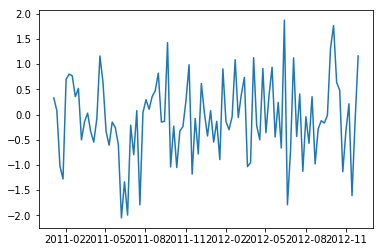

In [61]:
plt.plot(long_df.index, long_df.A) #時間做圖

### .resample()

In [118]:
from datetime import datetime
dates = pd.date_range('1/1/2011', periods=100)

ts = pd.Series(np.random.randn(100), index = dates)

ts.head()

2011-01-01    0.521735
2011-01-02   -1.421125
2011-01-03   -0.281824
2011-01-04   -1.495140
2011-01-05    0.059458
Freq: D, dtype: float64

In [119]:
ts_M = ts.resample('M')
ts_M.sum() #要搭配函數reduce才可以

2011-01-31   -2.194319
2011-02-28   -6.573282
2011-03-31    5.546899
2011-04-30    1.056956
Freq: M, dtype: float64

In [122]:
ts_M = ts.resample('M')
ts_M.mean() #要搭配函數reduce才可以

2011-01-31   -0.070784
2011-02-28   -0.234760
2011-03-31    0.178932
2011-04-30    0.105696
Freq: M, dtype: float64

### 時間freq

In [76]:
dates = pd.date_range('1/1/2011', periods=10, freq='M')
dates

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31'],
              dtype='datetime64[ns]', freq='M')

In [88]:
dates = pd.date_range('1/1/2011 12:50:50', periods=5, freq='BM') #business end of month = 月底
dates

DatetimeIndex(['2011-01-31 12:50:50', '2011-02-28 12:50:50',
               '2011-03-31 12:50:50', '2011-04-29 12:50:50',
               '2011-05-31 12:50:50'],
              dtype='datetime64[ns]', freq='BM')

In [87]:
dates = pd.date_range('1/1/2011 12:50:50', periods=5, freq='D', normalize=True) # 歸零到午夜
dates

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05'],
              dtype='datetime64[ns]', freq='D')

In [85]:
dates = pd.date_range('1/1/2011', periods=5, freq='3D') #每3 day一次
dates

DatetimeIndex(['2011-01-01', '2011-01-04', '2011-01-07', '2011-01-10',
               '2011-01-13'],
              dtype='datetime64[ns]', freq='3D')

In [92]:
dates = pd.date_range('1/1/2011 12:30', periods=5, freq='3h') #每3 hour一次
dates

DatetimeIndex(['2011-01-01 12:30:00', '2011-01-01 15:30:00',
               '2011-01-01 18:30:00', '2011-01-01 21:30:00',
               '2011-01-02 00:30:00'],
              dtype='datetime64[ns]', freq='3H')

In [94]:
dates = pd.date_range('1/1/2011', periods=5, freq='WOM-3FRI') #每個月第三週星期五
dates

DatetimeIndex(['2011-01-21', '2011-02-18', '2011-03-18', '2011-04-15',
               '2011-05-20'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

### from pandas.tseries.offsets import Hour, Minute

In [93]:
from pandas.tseries.offsets import Hour, Minute
dates = pd.date_range('1/1/2011 12:30', periods=5, freq=Hour(2)+Minute(30)) #每2.5 hour一次
dates

DatetimeIndex(['2011-01-01 12:30:00', '2011-01-01 15:00:00',
               '2011-01-01 17:30:00', '2011-01-01 20:00:00',
               '2011-01-01 22:30:00'],
              dtype='datetime64[ns]', freq='150T')

In [115]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011,1,1)
now + 3*Day() 

Timestamp('2011-01-04 00:00:00')

In [116]:
now + MonthEnd(0)

Timestamp('2011-01-31 00:00:00')

In [117]:
now + MonthEnd(1)

Timestamp('2011-01-31 00:00:00')

### 移動數據 ts.shift()，注意簡單位移的time index不會改變，大間隔位移則會

In [106]:
dates = pd.date_range('1/1/2011', periods=10, freq='D')
ts = pd.Series(np.random.randint(1,10, size=(10)), index=dates)
ts

2011-01-01    2
2011-01-02    4
2011-01-03    9
2011-01-04    2
2011-01-05    7
2011-01-06    2
2011-01-07    4
2011-01-08    6
2011-01-09    3
2011-01-10    5
Freq: D, dtype: int64

In [107]:
ts.shift(-1) #往前挪

2011-01-01    4.0
2011-01-02    9.0
2011-01-03    2.0
2011-01-04    7.0
2011-01-05    2.0
2011-01-06    4.0
2011-01-07    6.0
2011-01-08    3.0
2011-01-09    5.0
2011-01-10    NaN
Freq: D, dtype: float64

In [108]:
ts.shift(1) #往後挪

2011-01-01    NaN
2011-01-02    2.0
2011-01-03    4.0
2011-01-04    9.0
2011-01-05    2.0
2011-01-06    7.0
2011-01-07    2.0
2011-01-08    4.0
2011-01-09    6.0
2011-01-10    3.0
Freq: D, dtype: float64

In [110]:
pct_change = ts/ts.shift(1) -1 #除以前一天的數值
pct_change

2011-01-01         NaN
2011-01-02    1.000000
2011-01-03    1.250000
2011-01-04   -0.777778
2011-01-05    2.500000
2011-01-06   -0.714286
2011-01-07    1.000000
2011-01-08    0.500000
2011-01-09   -0.500000
2011-01-10    0.666667
Freq: D, dtype: float64

In [112]:
ts.shift(3, freq='D')

2011-01-04    2
2011-01-05    4
2011-01-06    9
2011-01-07    2
2011-01-08    7
2011-01-09    2
2011-01-10    4
2011-01-11    6
2011-01-12    3
2011-01-13    5
Freq: D, dtype: int64

In [113]:
ts.shift(1, freq='3D')

2011-01-04    2
2011-01-05    4
2011-01-06    9
2011-01-07    2
2011-01-08    7
2011-01-09    2
2011-01-10    4
2011-01-11    6
2011-01-12    3
2011-01-13    5
Freq: D, dtype: int64

In [114]:
ts.shift(1, freq='90T')

2011-01-01 01:30:00    2
2011-01-02 01:30:00    4
2011-01-03 01:30:00    9
2011-01-04 01:30:00    2
2011-01-05 01:30:00    7
2011-01-06 01:30:00    2
2011-01-07 01:30:00    4
2011-01-08 01:30:00    6
2011-01-09 01:30:00    3
2011-01-10 01:30:00    5
Freq: D, dtype: int64

### 時期：pd.Period()

In [123]:
p = pd.Period(2007, 'A-DEC') #每一年DEC的最後一個日曆日
p+5

Period('2012', 'A-DEC')

In [124]:
rng = pd.period_range('1/1/2011','6/30/2011',freq='M')
rng

PeriodIndex(['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06'], dtype='period[M]', freq='M')

In [126]:
ts = pd.Series(np.random.randn(6), index =rng)
ts

2011-01    0.125590
2011-02    1.454618
2011-03   -0.193238
2011-04    1.920844
2011-05   -0.179949
2011-06   -0.847263
Freq: M, dtype: float64

In [127]:
ts.asfreq('M',how='start')

2011-01    0.125590
2011-02    1.454618
2011-03   -0.193238
2011-04    1.920844
2011-05   -0.179949
2011-06   -0.847263
Freq: M, dtype: float64

In [128]:
ts.asfreq('B',how='end')

2011-01-31    0.125590
2011-02-28    1.454618
2011-03-31   -0.193238
2011-04-29    1.920844
2011-05-31   -0.179949
2011-06-30   -0.847263
Freq: B, dtype: float64

In [129]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [130]:
p.asfreq('D','start')

Period('2011-11-01', 'D')

In [131]:
p.asfreq('D','end')

Period('2012-01-31', 'D')

In [132]:
p4pm = (p.asfreq('B','e')-1).asfreq('T','s') + 16*60  #季度結束的前一天下午4pm
p4pm

Period('2012-01-30 16:00', 'T')

In [133]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

### pd.period_range() 

In [134]:
rng = pd.period_range('2011Q3','2014Q4',freq='Q-JAN')
rng

PeriodIndex(['2011Q3', '2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4',
             '2013Q1', '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2',
             '2014Q3', '2014Q4'],
            dtype='period[Q-JAN]', freq='Q-JAN')

In [136]:
ts = pd.Series(np.random.rand(len(rng)) , index = rng)
ts

2011Q3    0.585737
2011Q4    0.682482
2012Q1    0.742552
2012Q2    0.043747
2012Q3    0.009410
2012Q4    0.931855
2013Q1    0.214489
2013Q2    0.681745
2013Q3    0.320818
2013Q4    0.293634
2014Q1    0.987580
2014Q2    0.729367
2014Q3    0.578243
2014Q4    0.396653
Freq: Q-JAN, dtype: float64

In [137]:
new_rng = (rng.asfreq('B','e')-1).asfreq('T','s') + 16*60
new_rng

PeriodIndex(['2010-10-28 16:00', '2011-01-28 16:00', '2011-04-28 16:00',
             '2011-07-28 16:00', '2011-10-28 16:00', '2012-01-30 16:00',
             '2012-04-27 16:00', '2012-07-30 16:00', '2012-10-30 16:00',
             '2013-01-30 16:00', '2013-04-29 16:00', '2013-07-30 16:00',
             '2013-10-30 16:00', '2014-01-30 16:00'],
            dtype='period[T]', freq='T')

In [139]:
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0.585737
2011-01-28 16:00:00    0.682482
2011-04-28 16:00:00    0.742552
2011-07-28 16:00:00    0.043747
2011-10-28 16:00:00    0.009410
2012-01-30 16:00:00    0.931855
2012-04-27 16:00:00    0.214489
2012-07-30 16:00:00    0.681745
2012-10-30 16:00:00    0.320818
2013-01-30 16:00:00    0.293634
2013-04-29 16:00:00    0.987580
2013-07-30 16:00:00    0.729367
2013-10-30 16:00:00    0.578243
2014-01-30 16:00:00    0.396653
dtype: float64

### 重新採樣: .resample(freq='').方法() ，一般常用降階

In [145]:
dates = pd.date_range('1/1/2011', periods=10, freq='D')
ts = pd.Series(np.random.randint(1,10, size=(10)), index=dates)

ts.resample('3D').mean()

2011-01-01    7.000000
2011-01-04    5.333333
2011-01-07    2.666667
2011-01-10    6.000000
Freq: 3D, dtype: float64

In [146]:
ts.resample('3D').sum()

2011-01-01    21
2011-01-04    16
2011-01-07     8
2011-01-10     6
Freq: 3D, dtype: int64

### K線圖: .resample(freq='').ohlc()

In [154]:
dates = pd.date_range('1/1/2011', periods=10, freq='5T') #T是分鐘數
ts = pd.Series(np.random.randint(1,10, size=(10)), index=dates)

ts_ohlc = ts.resample('10T').ohlc()
ts_ohlc

,open,high,low,close
2011-01-01 00:00:00,9,9,7,7
2011-01-01 00:10:00,3,3,3,3
2011-01-01 00:20:00,8,8,2,2
2011-01-01 00:30:00,7,9,7,9
2011-01-01 00:40:00,1,9,1,9


### 升採樣：低頻到高頻，需要插值： .resample('').差值方法()

In [168]:
frame = pd.DataFrame(np.random.randn(10,3),
                     index = pd.date_range('01/01/2011', freq='3D', periods=10),
                     columns = ['A','B','C'])
frame.head()

,A,B,C
2011-01-01,1.443311,1.704644,0.458485
2011-01-04,-1.819722,-0.599541,1.265269
2011-01-07,-0.340054,0.913734,0.808533
2011-01-10,0.928654,0.625083,0.022412
2011-01-13,-0.792406,1.283589,-1.757194


In [167]:
df_D = frame.resample('D').ffill() #要提供插值方法
df_D.head(7)

,A,B,C
2011-01-01,0.127194,-0.335467,0.506254
2011-01-02,0.127194,-0.335467,0.506254
2011-01-03,0.127194,-0.335467,0.506254
2011-01-04,1.319905,-0.342619,1.022172
2011-01-05,1.319905,-0.342619,1.022172
2011-01-06,1.319905,-0.342619,1.022172
2011-01-07,0.402279,-0.243497,0.195980


## 時間序列繪圖: 注意df要parse_dates=True, index_col=_

In [210]:
df = pd.read_csv('DJI.csv', parse_dates=True, index_col=0)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-09-20,13575.169922,13599.019531,13503.000000,13596.929688,13596.929688,117910000
2012-09-21,13597.240234,13647.099609,13571.530273,13579.469727,13579.469727,429610000
2012-09-24,13577.849609,13601.900391,13521.679688,13558.919922,13558.919922,120370000
2012-09-25,13559.919922,13620.209961,13457.250000,13457.549805,13457.549805,138630000
2012-09-26,13458.629883,13480.370117,13406.910156,13413.509766,13413.509766,124350000


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-09-20 to 2017-09-20
Data columns (total 6 columns):
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Adj Close    1258 non-null float64
Volume       1258 non-null int64
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


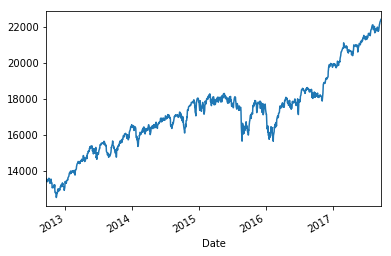

In [213]:
df['Close'].plot()

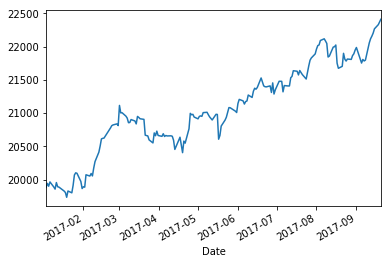

In [214]:
df['Close'].ix['2017'].plot() #只選擇2017

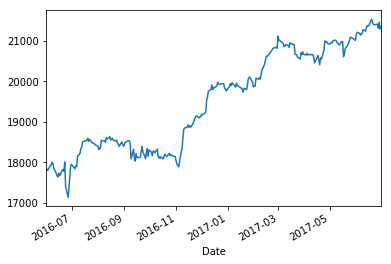

In [215]:
df['Close'].ix['2016-06':'2017-06'].plot()

### moving window function 均線做圖： Series.rolling(天數).方法()

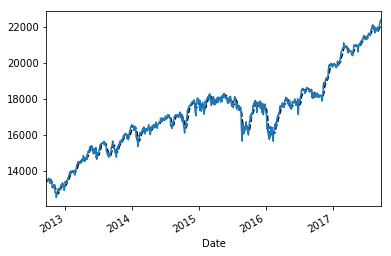

In [226]:
df.Close.rolling(10).mean().plot(style='k--')
df['Close'].plot()

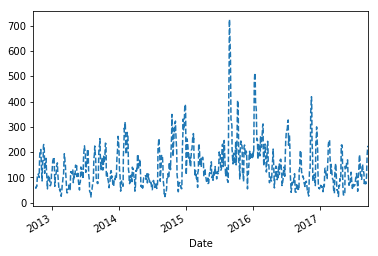

In [228]:
df.Close.rolling(10).std().plot(style='--')

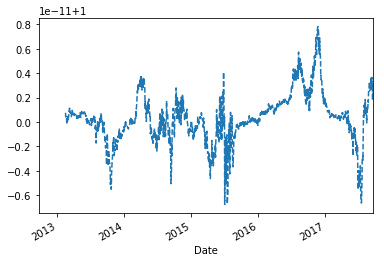

In [233]:
df.Close.rolling(100).corr().plot(style='--') #相關係數

## 移動均線

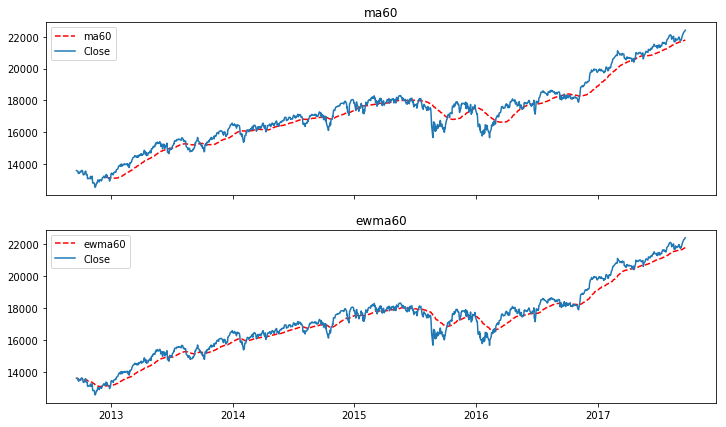

In [261]:
fig, axes = plt.subplots(nrows=2, ncols=1 , sharex=True, sharey=True, figsize=(12,7))

df = pd.read_csv('DJI.csv', parse_dates=True, index_col=0)

dji_px = df['Close']

ma60 = dji_px.rolling(60).mean()
ewma60 = dji_px.ewm(span=60).mean()

axes[0].plot(ma60,'r--', label='ma60')
axes[0].plot(dji_px)
axes[0].set_title('ma60')
axes[0].legend(loc='best')

axes[1].plot(ewma60,'r--', label='ewma60')
axes[1].plot(dji_px)
axes[1].set_title('ewma60')
axes[1].legend(loc='best')

## 相關係數表: dji跟aapl的corr

In [264]:
dji = pd.read_csv('DJI.csv', parse_dates=True, index_col=0)
aapl = pd.read_csv('AAPL.csv', parse_dates=True, index_col=0)

In [265]:
aapl_ret = aapl.Close/aapl.Close.shift(1) -1
dji_ret = dji.Close/dji.Close.shift(1) -1

In [276]:
corr = aapl_ret.rolling(30, min_periods=10).corr(dji_ret)
corr.tail()

Date
2017-09-15    0.698761
2017-09-18    0.676076
2017-09-19    0.688199
2017-09-20    0.667847
2017-09-21    0.683369
Name: Close, dtype: float64

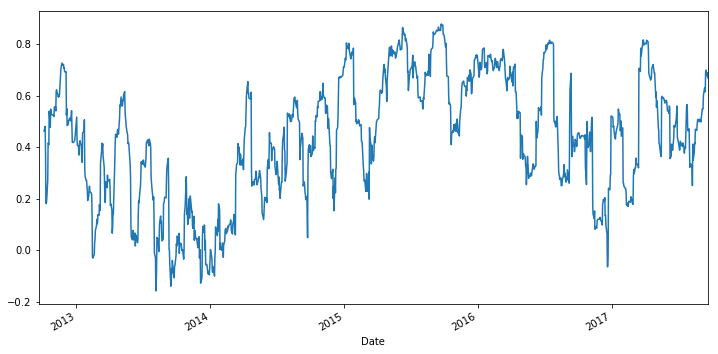

In [275]:
corr.plot(figsize=(12,6))

# 金融和經濟數據應用

### 頻率不同時間規整

In [284]:
date1 = pd.date_range('1/1/2011', freq='D', periods= 6)
data1 = pd.DataFrame(np.random.randn(6), index=date1)

date2 = pd.date_range('1/1/2011', freq='2D', periods= 3)
data2 = pd.DataFrame(np.random.randn(3), index=date2)

data1+data2

,0
2011-01-01,-0.558230
2011-01-02,NaN
2011-01-03,-1.559785
2011-01-04,NaN
2011-01-05,-0.894485
2011-01-06,NaN


In [285]:
data1 + data2.resample('D').ffill() #使用插值法即可相加

,0
2011-01-01,-0.558230
2011-01-02,1.563439
2011-01-03,-1.559785
2011-01-04,-0.684453
2011-01-05,-0.894485
2011-01-06,NaN


In [286]:
data1.reindex(data2.index)

,0
2011-01-01,-0.777980
2011-01-03,-0.989597
2011-01-05,0.326148


In [287]:
data2.reindex(data1.index)

,0
2011-01-01,0.219751
2011-01-02,NaN
2011-01-03,-0.570189
2011-01-04,NaN
2011-01-05,-1.220634
2011-01-06,NaN


In [295]:
date1 = pd.date_range('2011Q3', freq='Q-SEP', periods= 12)
gdp = pd.DataFrame(np.random.randn(12), index=date1)

date2 = pd.date_range('2011Q1', freq='A-DEC', periods= 4)
inf = pd.DataFrame(np.random.randn(4), index=date2)

gdp

,0
2011-09-30,-0.986733
2011-12-31,-1.381264
2012-03-31,-0.866204
2012-06-30,-0.401381
2012-09-30,-1.762399
2012-12-31,-2.613197
2013-03-31,-0.344738
2013-06-30,2.043098
2013-09-30,0.108081
2013-12-31,1.608931


In [293]:
inf_q = inf.asfreq('Q-SEP', how='end')
inf_q

,0
2011-12-31,-1.400228
2012-03-31,NaN
2012-06-30,NaN
2012-09-30,NaN
2012-12-31,1.105510
2013-03-31,NaN
2013-06-30,NaN
2013-09-30,NaN
2013-12-31,-0.446528
2014-03-31,NaN


In [294]:
inf_q.reindex(gdp.index).ffill()

,0
2011-09-30,NaN
2011-12-31,-1.400228
2012-03-31,-1.400228
2012-06-30,-1.400228
2012-09-30,-1.400228
2012-12-31,1.105510
2013-03-31,1.105510
2013-06-30,1.105510
2013-09-30,1.105510
2013-12-31,-0.446528


### Cumulative return: (1+pct_change).cumprod()

In [296]:
df = pd.read_csv('DJI.csv', parse_dates=True, index_col=0)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-09-20,13575.169922,13599.019531,13503.000000,13596.929688,13596.929688,117910000
2012-09-21,13597.240234,13647.099609,13571.530273,13579.469727,13579.469727,429610000
2012-09-24,13577.849609,13601.900391,13521.679688,13558.919922,13558.919922,120370000
2012-09-25,13559.919922,13620.209961,13457.250000,13457.549805,13457.549805,138630000
2012-09-26,13458.629883,13480.370117,13406.910156,13413.509766,13413.509766,124350000


In [298]:
ret = df['Adj Close'].pct_change() #日計算
ret_index = (1+ret).cumprod() #累積報酬率
ret_index[0] =1
ret_index[0:10]

Date
2012-09-20    1.000000
2012-09-21    0.998716
2012-09-24    0.997205
2012-09-25    0.989749
2012-09-26    0.986510
2012-09-27    0.991839
2012-09-28    0.988247
2012-10-01    0.993983
2012-10-02    0.991574
2012-10-03    0.992475
Name: Adj Close, dtype: float64

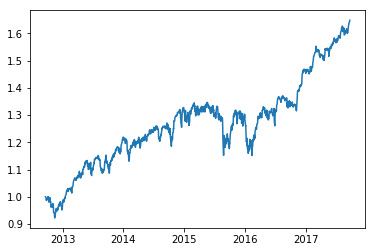

In [299]:
plt.plot(ret_index)

In [303]:
M_ret = ret_index.resample('BM').pct_change()  #兩點累積報酬率中間就是該時段的累積報酬率XD
M_ret['2017']

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
.resample() is now a deferred operation
You called pct_change(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  if __name__ == '__main__':


Date
2017-01-31    0.009929
2017-02-28    0.025919
2017-03-31    0.019531
2017-04-28   -0.006645
2017-05-31    0.012189
2017-06-30    0.018197
2017-07-31    0.012358
2017-08-31    0.015422
2017-09-29    0.007614
Freq: BM, Name: Adj Close, dtype: float64

### 分組變換、分析

In [18]:
import random; random.seed(10)
import string

N=1000
def rands(n):
    choices = string.ascii_uppercase
    return ''.join([random.choice(choices) for _ in range(n)])

tickers = np.array([rands(4) for _ in range(N)]) #N=1000個數，每個股票代碼5個字
tickers[0:5]

array(['SBNP', 'SAGO', 'PIUZ', 'FBQP', 'KCHX'],
      dtype='<U4')

In [367]:
M=500 #取M個股票
df = pd.DataFrame({'Momentum': np.random.randn(M)/200 + 0.3,
                   'Value': np.random.randn(M)/300 + 0.5,
                   'ShortInterest': np.random.randn(M)/200 - 0.2}, 
                  index = tickers[0:M])
df.head()

,Momentum,ShortInterest,Value
SBNP,0.302487,-0.211248,0.499693
SAGO,0.304244,-0.196755,0.494182
PIUZ,0.297120,-0.202254,0.501528
FBQP,0.290264,-0.207643,0.496589
KCHX,0.300750,-0.197975,0.500802


In [368]:
ind_names = ['A','B','C','D','E'] #產業類別

stock_cats=[] #把每一個股票代碼，歸到某個產業別
for i in range(N):
    sampler = np.random.randint(0,len(ind_names))
    stock_cats.append(ind_names[sampler])

industries = pd.Series(stock_cats[0:M], index = tickers[0:M],
                       name = 'industry') #只取M組

industries.head() #分類結果計數

SBNP    C
SAGO    E
PIUZ    E
FBQP    A
KCHX    D
Name: industry, dtype: object

In [369]:
industries.value_counts() #分類結果計數

D    109
E     99
B     98
A     98
C     96
Name: industry, dtype: int64

In [370]:
by_industry = df.groupby(industries)
by_industry

In [371]:
by_industry.mean()

,Momentum,ShortInterest,Value
industry,,,
A,0.300530,-0.199902,0.500065
B,0.298699,-0.199890,0.499525
C,0.300281,-0.199081,0.500362
D,0.299576,-0.200197,0.499667
E,0.299929,-0.199251,0.500114


In [372]:
by_industry.describe()

Momentum  ShortInterest       Value
industry                                             
A        count   98.000000      98.000000   98.000000
         mean     0.300530      -0.199902    0.500065
         std      0.004514       0.004975    0.003194
         min      0.288867      -0.211612    0.492111
         25%      0.297626      -0.203560    0.497827
         50%      0.300179      -0.200091    0.499895
         75%      0.303267      -0.196545    0.502353
         max      0.310623      -0.187298    0.508751
B        count   98.000000      98.000000   98.000000
         mean     0.298699      -0.199890    0.499525
         std      0.005078       0.004278    0.003541
         min      0.285935      -0.211186    0.490730
         25%      0.295184      -0.202266    0.497402
         50%      0.299465      -0.199506    0.499310
         75%      0.302535      -0.197101    0.501854
         max      0.310687      -0.191431    0.508978
C        count   96.000000      96.000000   96.000000
         mean     0.300281      -0.199081    0.500362
         std      0.005010       0.005062    0.002801
         min      0.288697      -0.214163    0.493394
         25%      0.296940      -0.201930    0.498427
         50%      0.300853      -0.198791    0.500288
         75%      0.303364      -0.195676    0.502115
         max      0.311259      -0.188239    0.508127
D        count  109.000000     109.000000  109.000000
         mean     0.299576      -0.200197    0.499667
         std      0.004701       0.005611    0.003519
         min      0.284881      -0.212057    0.488580
         25%      0.296779      -0.204696    0.497200
         50%      0.299593      -0.199375    0.500131
         75%      0.302756      -0.195738    0.502456
         max      0.308677      -0.186780    0.506237
E        count   99.000000      99.000000   99.000000
         mean     0.299929      -0.199251    0.500114
         std      0.005385       0.004423    0.003226
         min      0.286680      -0.209855    0.490357
         25%      0.296548      -0.202067    0.498347
         50%      0.299948      -0.199047    0.500502
         75%      0.303651      -0.196661    0.502378
         max      0.314927      -0.185740    0.508450

### factor analysis

In [19]:
fac1, fac2, fac3 = np.random.rand(3,1000)

ticker_subset = tickers.take(np.random.permutation(N)[:1000])

port = pd.Series(0.7*fac1 + 0.2*fac2 + 0.1*fac3 + rand(1000),  #加上weights跟noise
                 index = ticker_subset) #類似整體市場指標，某個benchmark

factors = pd.DataFrame({'f1':fac1, 'f2':fac2, 'f3':fac3},
                       index = ticker_subset)

factors.head()

,f1,f2,f3
IXWK,0.766822,0.714560,0.190954
LJIC,0.553067,0.057731,0.289570
JEQZ,0.580618,0.841339,0.328702
LOBT,0.782596,0.222128,0.210431
LTYF,0.364632,0.297911,0.975674


In [20]:
factors.corrwith(port)

f1    0.560973
f2    0.130183
f3    0.056617
dtype: float64

## 使用sklearn做LinearRegression

In [408]:
#投資組合的Beta? --> noise很小，coef很逼近原本檔案
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(factors.values.reshape(-1, 3), port.values.reshape(-1, 1))
print('coef:', regr.coef_) #線的斜率
print('mse:', np.mean((factors.values.reshape(-1, 3) - port.values.reshape(-1, 1))**2)) #mean square error
print('score:', regr.score(factors.values.reshape(-1, 3), port.values.reshape(-1, 1))) #線的相關係數

coef: [[ 0.70315376  0.19335362  0.05563198]]
mse: 0.422472321294
score: 0.35237385046


In [22]:
#f1跟f2的關聯 --> 幾乎無關
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(factors.f1.values.reshape(-1, 1), factors.f2.values.reshape(-1, 1))
print('coef:', regr.coef_) #線的斜率
print('mse:', np.mean((factors.f1.values.reshape(-1, 1) - factors.f2.values.reshape(-1, 1))**2)) #mean square error
print('score:', regr.score(factors.f1.values.reshape(-1, 1), factors.f2.values.reshape(-1, 1))) #線的相關係數

coef: [[-0.02516773]]
mse: 0.169842075563
score: 0.000649456337445


## 自製信號線

In [7]:
#偽造一支股票價格

n=1000 #天數
np.random.seed(50)
px = (100+np.random.randint(-5,5+1,n).cumsum()) #從100元隨機漫步
dates = pd.date_range('1/1/2016', periods=n)

px_s = pd.Series(px, index = dates)
px_s.head()

2016-01-01    95
2016-01-02    90
2016-01-03    86
2016-01-04    85
2016-01-05    86
Freq: D, dtype: int64

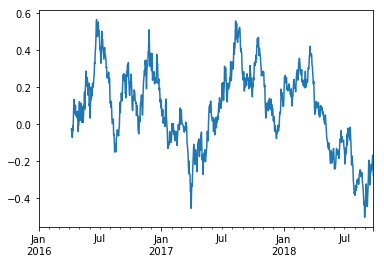

In [8]:
px_s = pd.Series(px, index = dates)
returns = px_s.pct_change()

def to_index(returns):
    index = (1+returns).cumprod()
    #first_loc = index.notnull().argmax()-1
    index[0] = 1
    index.fillna(method='ffill', inplace=True)
    return index

def trend_signal(returns, lookback, lag):
    signal = returns.rolling(window=lookback ,min_periods=lookback-5).sum()
    return signal.shift(lag)

signal = trend_signal(returns, 100, 3)
signal.plot()

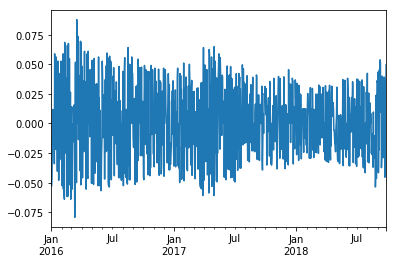

In [9]:
returns.plot()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
.resample() is now a deferred operation
You called resample(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  if __name__ == '__main__':


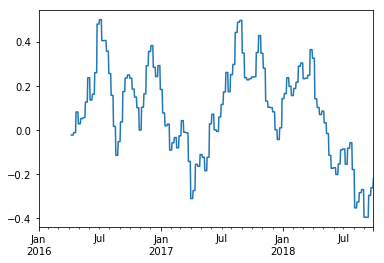

In [10]:
trade_friday = signal.resample('W-FRI').resample('B').ffill() #只抽取每週五的動量signal出來，其他全部ffill
trade_friday.plot()

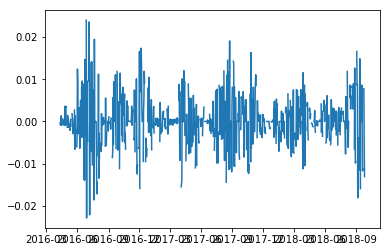

In [11]:
trade_rets = trade_friday.shift(1)*returns #把每週五的signal數值後移動一格，然後乘上每天的波動率
plt.plot(trade_rets)

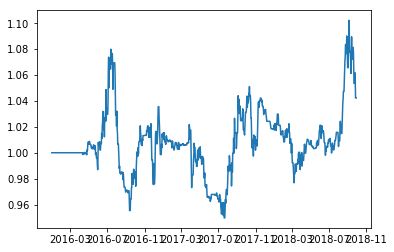

In [12]:
plt.plot(to_index(trade_rets)) #這是新的收益曲線！！

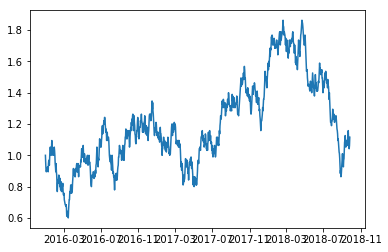

In [13]:
plt.plot(to_index(returns)) #這是原版的累積收益曲線

## 由A的股價線性回歸B的股價

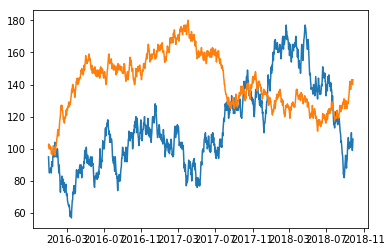

In [27]:
#偽造兩隻股票

n=1000 #天數
np.random.seed(50)
dates = pd.date_range('1/1/2016', periods=n)

px = (100+np.random.randint(-5,5+1,n).cumsum()) #從100元隨機漫步
px2 = (100+np.random.randint(-3,3+1,n).cumsum())

px_s = pd.Series(px, index = dates)
px2_s = pd.Series(px2, index = dates)

plt.plot(px_s)
plt.plot(px2_s)

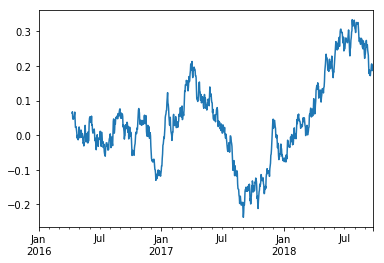

In [29]:
px_ret = px_s.pct_change()
px2_ret = px2_s.pct_change()

px_ret.rolling(100).corr(px2_ret).plot()

In [32]:
#投資組合的Beta? --> noise很小，coef很逼近原本檔案
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(px_s.values.reshape(-1, 1), px2_s.values.reshape(-1, 1))
print('coef:', regr.coef_) #線的斜率
print('mse:', np.mean((px_s.values.reshape(-1, 1) - px2_s.values.reshape(-1, 1))**2)) #mean square error
print('score:', regr.score(px_s.values.reshape(-1, 1), px2_s.values.reshape(-1, 1))) #線的相關係數

coef: [[-0.24849428]]
mse: 2095.361
score: 0.14287149197


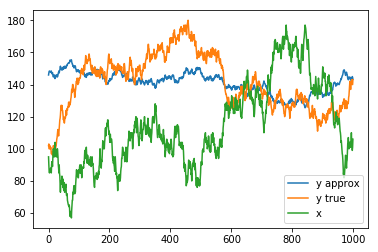

In [37]:
plt.plot(regr.predict(px_s.values.reshape(-1, 1)), label='y approx')
plt.plot(px2_s.values.reshape(-1, 1), label='y true')
plt.plot(px_s.values.reshape(-1, 1), label='x')
plt.legend(loc='best')